<a href="https://colab.research.google.com/github/CHGROSJEAN/2024_MLEES/blob/main/Projet/Projet_Charlotte_Grosjean_GMM_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import libraries and data


In [3]:
# Import
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import os
from shapely.geometry import Point
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import seaborn as sns


Download data sets

In [4]:
# Reading the Excel files
grandvennes = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/GrandVennes.xlsx")
riandpre = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/RiandPre.xlsx")
chandieu = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Chandieu.xlsx")
geopolis = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Geopolis.xlsx")
lexplore = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/LExplore.xlsx")
bethusy = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Bethusy.xlsx")
boisgentils = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/BoisGentils.xlsx")
elysee = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Elysee.xlsx")
pontaise = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Pontaise.xlsx")
rouvraie = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Rouvraie.xlsx")
vclb = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/VersChezLesBlancs.xlsx")



# Displaying the first few rows of each dataset
print("Data from Grand-Vennes:")
print(grandvennes.head())

print("\nData from Riand-Pré:")
print(riandpre.head())

print("\nData from Chandieu:")
print(chandieu.head())

print("\nData from Geopolis:")
print(geopolis.head())

print("\nData from LExplore:")
print(lexplore.head())

print("\nData from Bethusy:")
print(bethusy.head())

print("\nData from Bois Gentils:")
print(boisgentils.head())

print("\nData from Elysée:")
print(elysee.head())

print("\nData from Pontaise:")
print(pontaise.head())

print("\nData from Rouvraie:")
print(rouvraie.head())

print("\nData from Vers-chez-les-Blanc:")
print(vclb.head())


Data from Grand-Vennes:
   Index             DateTime  Precipitation
0      1  07.01.2023 08:27:54              0
1      2  07.01.2023 08:30:54              0
2      3  07.01.2023 08:33:54              0
3      4  07.01.2023 08:36:54              0
4      5  07.01.2023 08:39:54              0

Data from Riand-Pré:
   Index             DateTime  Precipitation
0      1  09.11.2022 00:03:39              0
1      2  09.11.2022 00:06:39              0
2      3  09.11.2022 00:09:39              0
3      4  09.11.2022 00:12:39              0
4      5  09.11.2022 00:15:39              0

Data from Chandieu:
   Index             DateTime  Precipitation
0      1  30.11.2022 00:03:07              0
1      2  30.11.2022 00:06:07              0
2      3  30.11.2022 00:09:07              0
3      4  30.11.2022 00:12:07              0
4      5  30.11.2022 00:15:07              0

Data from Geopolis:
   Index             DateTime  Precipitation
0      1  11.11.2022 00:02:18              0
1      2  11

In [5]:
# Ensuring the 'DateTime' the column is of datetime type for both datasets
grandvennes['DateTime'] = pd.to_datetime(grandvennes['DateTime'], dayfirst=True)
riandpre['DateTime'] = pd.to_datetime(riandpre['DateTime'], dayfirst=True)
chandieu['DateTime'] = pd.to_datetime(chandieu['DateTime'], dayfirst=True)
geopolis['DateTime'] = pd.to_datetime(geopolis['DateTime'], dayfirst=True)
lexplore['DateTime'] = pd.to_datetime(lexplore['DateTime'], dayfirst=True)
bethusy['DateTime'] = pd.to_datetime(bethusy['DateTime'], dayfirst=True)
boisgentils['DateTime'] = pd.to_datetime(boisgentils['DateTime'], dayfirst=True)
elysee['DateTime'] = pd.to_datetime(elysee['DateTime'], dayfirst=True)
pontaise['DateTime'] = pd.to_datetime(pontaise['DateTime'], dayfirst=True)
rouvraie['DateTime'] = pd.to_datetime(rouvraie['DateTime'], dayfirst=True)
vclb['DateTime'] = pd.to_datetime(vclb['DateTime'], dayfirst=True)



# Setting the DateTime column as the index for easier time-based operations
grandvennes.set_index('DateTime', inplace=True)
riandpre.set_index('DateTime', inplace=True)
chandieu.set_index('DateTime', inplace=True)
geopolis.set_index('DateTime', inplace=True)
lexplore.set_index('DateTime', inplace=True)
bethusy.set_index('DateTime', inplace=True)
boisgentils.set_index('DateTime', inplace=True)
elysee.set_index('DateTime', inplace=True)
pontaise.set_index('DateTime', inplace=True)
rouvraie.set_index('DateTime', inplace=True)
vclb.set_index('DateTime', inplace=True)

# 2. Complex GMM with 5 stations

Complete the same process than with 2 station but with all stations


In [6]:

# Round down the DateTime to the previous minute (removes seconds, truncating)
grandvennes.index = grandvennes.index.floor('min')  # rounded to the nearest lower minute
riandpre.index = riandpre.index.floor('min')
bethusy.index = bethusy.index.floor('min')
boisgentils.index = boisgentils.index.floor('min')
chandieu.index = chandieu.index.floor('min')
elysee.index = elysee.index.floor('min')
lexplore.index = lexplore.index.floor('min')
pontaise.index = pontaise.index.floor('min')
rouvraie.index = rouvraie.index.floor('min')
vclb.index = vclb.index.floor('min')
geopolis.index = geopolis.index.floor('min')

# Resample both datasets to ensure they have data every 3 minutes (if necessary)
# Resampling to the closest 3-minute interval and filling missing values with NaN
grandvennes_resampled = grandvennes.resample('3min').mean()
riandpre_resampled = riandpre.resample('3min').mean()
bethusy_resampled = bethusy.resample('3min').mean()
boisgentils_resampled = boisgentils.resample('3min').mean()
chandieu_resampled = chandieu.resample('3min').mean()
elysee_resampled = elysee.resample('3min').mean()
lexplore_resampled = lexplore.resample('3min').mean()
pontaise_resampled = pontaise.resample('3min').mean()
rouvraie_resampled = rouvraie.resample('3min').mean()
vclb_resampled = vclb.resample('3min').mean()
geopolis_resampled = geopolis.resample('3min').mean()


# Align both datasets to the common time period (intersection of their timestamps)
start_time = max(grandvennes_resampled.index.min(), riandpre_resampled.index.min(),bethusy_resampled.index.min(),
                 boisgentils_resampled.index.min(),chandieu_resampled.index.min(),elysee_resampled.index.min(), lexplore_resampled.index.min(),
                 pontaise_resampled.index.min(),rouvraie_resampled.index.min(),vclb_resampled.index.min(),geopolis_resampled.index.min())


end_time = min(grandvennes_resampled.index.max(), riandpre_resampled.index.max(), bethusy_resampled.index.max(),
               boisgentils_resampled.index.max(),chandieu_resampled.index.max(),elysee_resampled.index.max(),lexplore_resampled.index.max(),
               pontaise_resampled.index.max(),rouvraie_resampled.index.max(),vclb_resampled.index.max(),geopolis_resampled.index.max())

grandvennes_aligned = grandvennes_resampled.loc[start_time:end_time]
riandpre_aligned = riandpre_resampled.loc[start_time:end_time]
bethusy_aligned = bethusy_resampled.loc[start_time:end_time]
boisgentils_aligned = boisgentils_resampled.loc[start_time:end_time]
chandieu_aligned = chandieu_resampled.loc[start_time:end_time]
elysee_aligned = elysee_resampled.loc[start_time:end_time]
lexplore_aligned = lexplore_resampled.loc[start_time:end_time]
pontaise_aligned = pontaise_resampled.loc[start_time:end_time]
rouvraie_aligned = rouvraie_resampled.loc[start_time:end_time]
vclb_aligned = vclb_resampled.loc[start_time:end_time]
geopolis_aligned = geopolis_resampled.loc[start_time:end_time]

# Drop rows with missing values from both datasets
grandvennes_aligned = grandvennes_aligned.dropna()
riandpre_aligned = riandpre_aligned.dropna()
bethusy_aligned = bethusy_aligned.dropna()
boisgentils_aligned = boisgentils_aligned.dropna()
chandieu_aligned = chandieu_aligned.dropna()
elysee_aligned = elysee_aligned.dropna()
lexplore_aligned = lexplore_aligned.dropna()
pontaise_aligned = pontaise_aligned.dropna()
rouvraie_aligned = rouvraie_aligned.dropna()
vclb_aligned = vclb_aligned.dropna()
geopolis_aligned = geopolis_aligned.dropna()

# Now both datasets are aligned and cleaned. Viewing the cleaned and aligned data
print("Aligned and cleaned Grandvennes data:")
print(grandvennes_aligned.head())

print("Aligned and cleaned Riandpre data:")
print(riandpre_aligned.head())

print("Aligned and cleaned Bethusy data:")
print(bethusy_aligned.head())

print("Aligned and cleaned Boisgentils data:")
print(boisgentils_aligned.head())

print("Aligned and cleaned Chandieu data:")
print(chandieu_aligned.head())

print("Aligned and cleaned Elysee data:")
print(elysee_aligned.head())

print("Aligned and cleaned Lexplore data:")
print(lexplore_aligned.head())

print("Aligned and cleaned Pontaise data:")
print(pontaise_aligned.head())

print("Aligned and cleaned Rouvraie data:")
print(rouvraie_aligned.head())

print("Aligned and cleaned Vclb data:")
print(vclb_aligned.head())


Aligned and cleaned Grandvennes data:
                     Index  Precipitation
DateTime                                 
2023-01-07 08:27:00    1.0            0.0
2023-01-07 08:30:00    2.0            0.0
2023-01-07 08:33:00    3.0            0.0
2023-01-07 08:36:00    4.0            0.0
2023-01-07 08:39:00    5.0            0.0
Aligned and cleaned Riandpre data:
                       Index  Precipitation
DateTime                                   
2023-01-07 08:27:00  28489.0            0.0
2023-01-07 08:30:00  28490.0            0.0
2023-01-07 08:33:00  28491.0            0.0
2023-01-07 08:36:00  28492.0            0.0
2023-01-07 08:39:00  28493.0            0.0
Aligned and cleaned Bethusy data:
                       Index  Precipitation
DateTime                                   
2023-01-07 08:27:00  18409.0            0.0
2023-01-07 08:30:00  18410.0            0.0
2023-01-07 08:33:00  18411.0            0.0
2023-01-07 08:36:00  18412.0            0.0
2023-01-07 08:39:00  18413.

In [7]:
# Merge the datasets on the 'DateTime' index
combined_data = pd.concat(
    [
        grandvennes_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Grandvennes'}),
        riandpre_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Riandpre'}),
        bethusy_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Bethusy'}),
        boisgentils_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Boisgentils'}),
        chandieu_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Chandieu'}),
        elysee_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Elysee'}),
        lexplore_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Lexplore'}),
        pontaise_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Pontaise'}),
        rouvraie_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Rouvraie'}),
        vclb_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_VCLB'}),
        geopolis_aligned[['Precipitation']].rename(columns={'Precipitation': 'Precipitation_Geopolis'})
    ],
    axis=1,
    join='inner'  # Ensures alignment on shared indices only
)

# Display the first few rows of the combined data
print("Combined Precipitation Data:")
print(combined_data.head())
print(combined_data.shape)



Combined Precipitation Data:
                     Precipitation_Grandvennes  Precipitation_Riandpre  \
DateTime                                                                 
2023-01-19 14:03:00                        0.0                     5.0   
2023-01-19 14:06:00                        0.0                     5.0   
2023-01-19 14:09:00                        0.0                     2.0   
2023-01-19 14:12:00                        0.0                     1.0   
2023-01-19 14:15:00                        0.0                     0.0   

                     Precipitation_Bethusy  Precipitation_Boisgentils  \
DateTime                                                                
2023-01-19 14:03:00                    0.0                        0.0   
2023-01-19 14:06:00                    0.0                        0.0   
2023-01-19 14:09:00                    0.0                        0.0   
2023-01-19 14:12:00                    0.0                        0.0   
2023-01-19 14:

In [8]:
# Calculate the index for the splits
train_size = int(0.7 * len(combined_data))  # 70% for training
val_size = int(0.15 * len(combined_data))  # 15% for validation
test_size = len(combined_data) - train_size - val_size  # 15% for testing

# Split the data sequentially
train_data = combined_data[:train_size]
val_data = combined_data[train_size:train_size + val_size]
test_data = combined_data[train_size + val_size:]

# Display the sizes of each dataset
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

# Display the first few rows of each dataset
print("\nTraining Data:")
print(train_data.head())

print("\nValidation Data:")
print(val_data.head())

print("\nTest Data:")
print(test_data.head())


Training set size: 39986
Validation set size: 8568
Test set size: 8570

Training Data:
                     Precipitation_Grandvennes  Precipitation_Riandpre  \
DateTime                                                                 
2023-01-19 14:03:00                        0.0                     5.0   
2023-01-19 14:06:00                        0.0                     5.0   
2023-01-19 14:09:00                        0.0                     2.0   
2023-01-19 14:12:00                        0.0                     1.0   
2023-01-19 14:15:00                        0.0                     0.0   

                     Precipitation_Bethusy  Precipitation_Boisgentils  \
DateTime                                                                
2023-01-19 14:03:00                    0.0                        0.0   
2023-01-19 14:06:00                    0.0                        0.0   
2023-01-19 14:09:00                    0.0                        0.0   
2023-01-19 14:12:00          

In [11]:
# Extract X for each dataset
# For training data
X_train = train_data[['Precipitation_Grandvennes', 'Precipitation_Riandpre', 'Precipitation_Bethusy', 'Precipitation_Boisgentils', 'Precipitation_Chandieu', 'Precipitation_Elysee', 'Precipitation_Lexplore', 'Precipitation_Pontaise', 'Precipitation_Rouvraie', 'Precipitation_VCLB', 'Precipitation_Geopolis']]  # Features (precipitation from both stations)

# For validation data
X_valid = val_data[['Precipitation_Grandvennes', 'Precipitation_Riandpre', 'Precipitation_Bethusy', 'Precipitation_Boisgentils', 'Precipitation_Chandieu', 'Precipitation_Elysee', 'Precipitation_Lexplore', 'Precipitation_Pontaise', 'Precipitation_Rouvraie', 'Precipitation_VCLB', 'Precipitation_Geopolis']]  # Features (precipitation from both stations)

# For test data
X_test = test_data[['Precipitation_Grandvennes', 'Precipitation_Riandpre', 'Precipitation_Bethusy', 'Precipitation_Boisgentils', 'Precipitation_Chandieu', 'Precipitation_Elysee', 'Precipitation_Lexplore', 'Precipitation_Pontaise', 'Precipitation_Rouvraie', 'Precipitation_VCLB', 'Precipitation_Geopolis']]  # Features (precipitation from both stations)

# Display the first few rows of the extracted data
print("X_train:")
print(X_train.head())

print("\nX_valid:")
print(X_valid.head())

print("\nX_test:")
print(X_test.head())

X_train:
                     Precipitation_Grandvennes  Precipitation_Riandpre  \
DateTime                                                                 
2023-01-19 14:03:00                        0.0                     5.0   
2023-01-19 14:06:00                        0.0                     5.0   
2023-01-19 14:09:00                        0.0                     2.0   
2023-01-19 14:12:00                        0.0                     1.0   
2023-01-19 14:15:00                        0.0                     0.0   

                     Precipitation_Bethusy  Precipitation_Boisgentils  \
DateTime                                                                
2023-01-19 14:03:00                    0.0                        0.0   
2023-01-19 14:06:00                    0.0                        0.0   
2023-01-19 14:09:00                    0.0                        0.0   
2023-01-19 14:12:00                    0.0                        0.0   
2023-01-19 14:15:00               

**Visualisation des distributions des differents dataset**

(39986, 11) (8568, 11) (8570, 11)


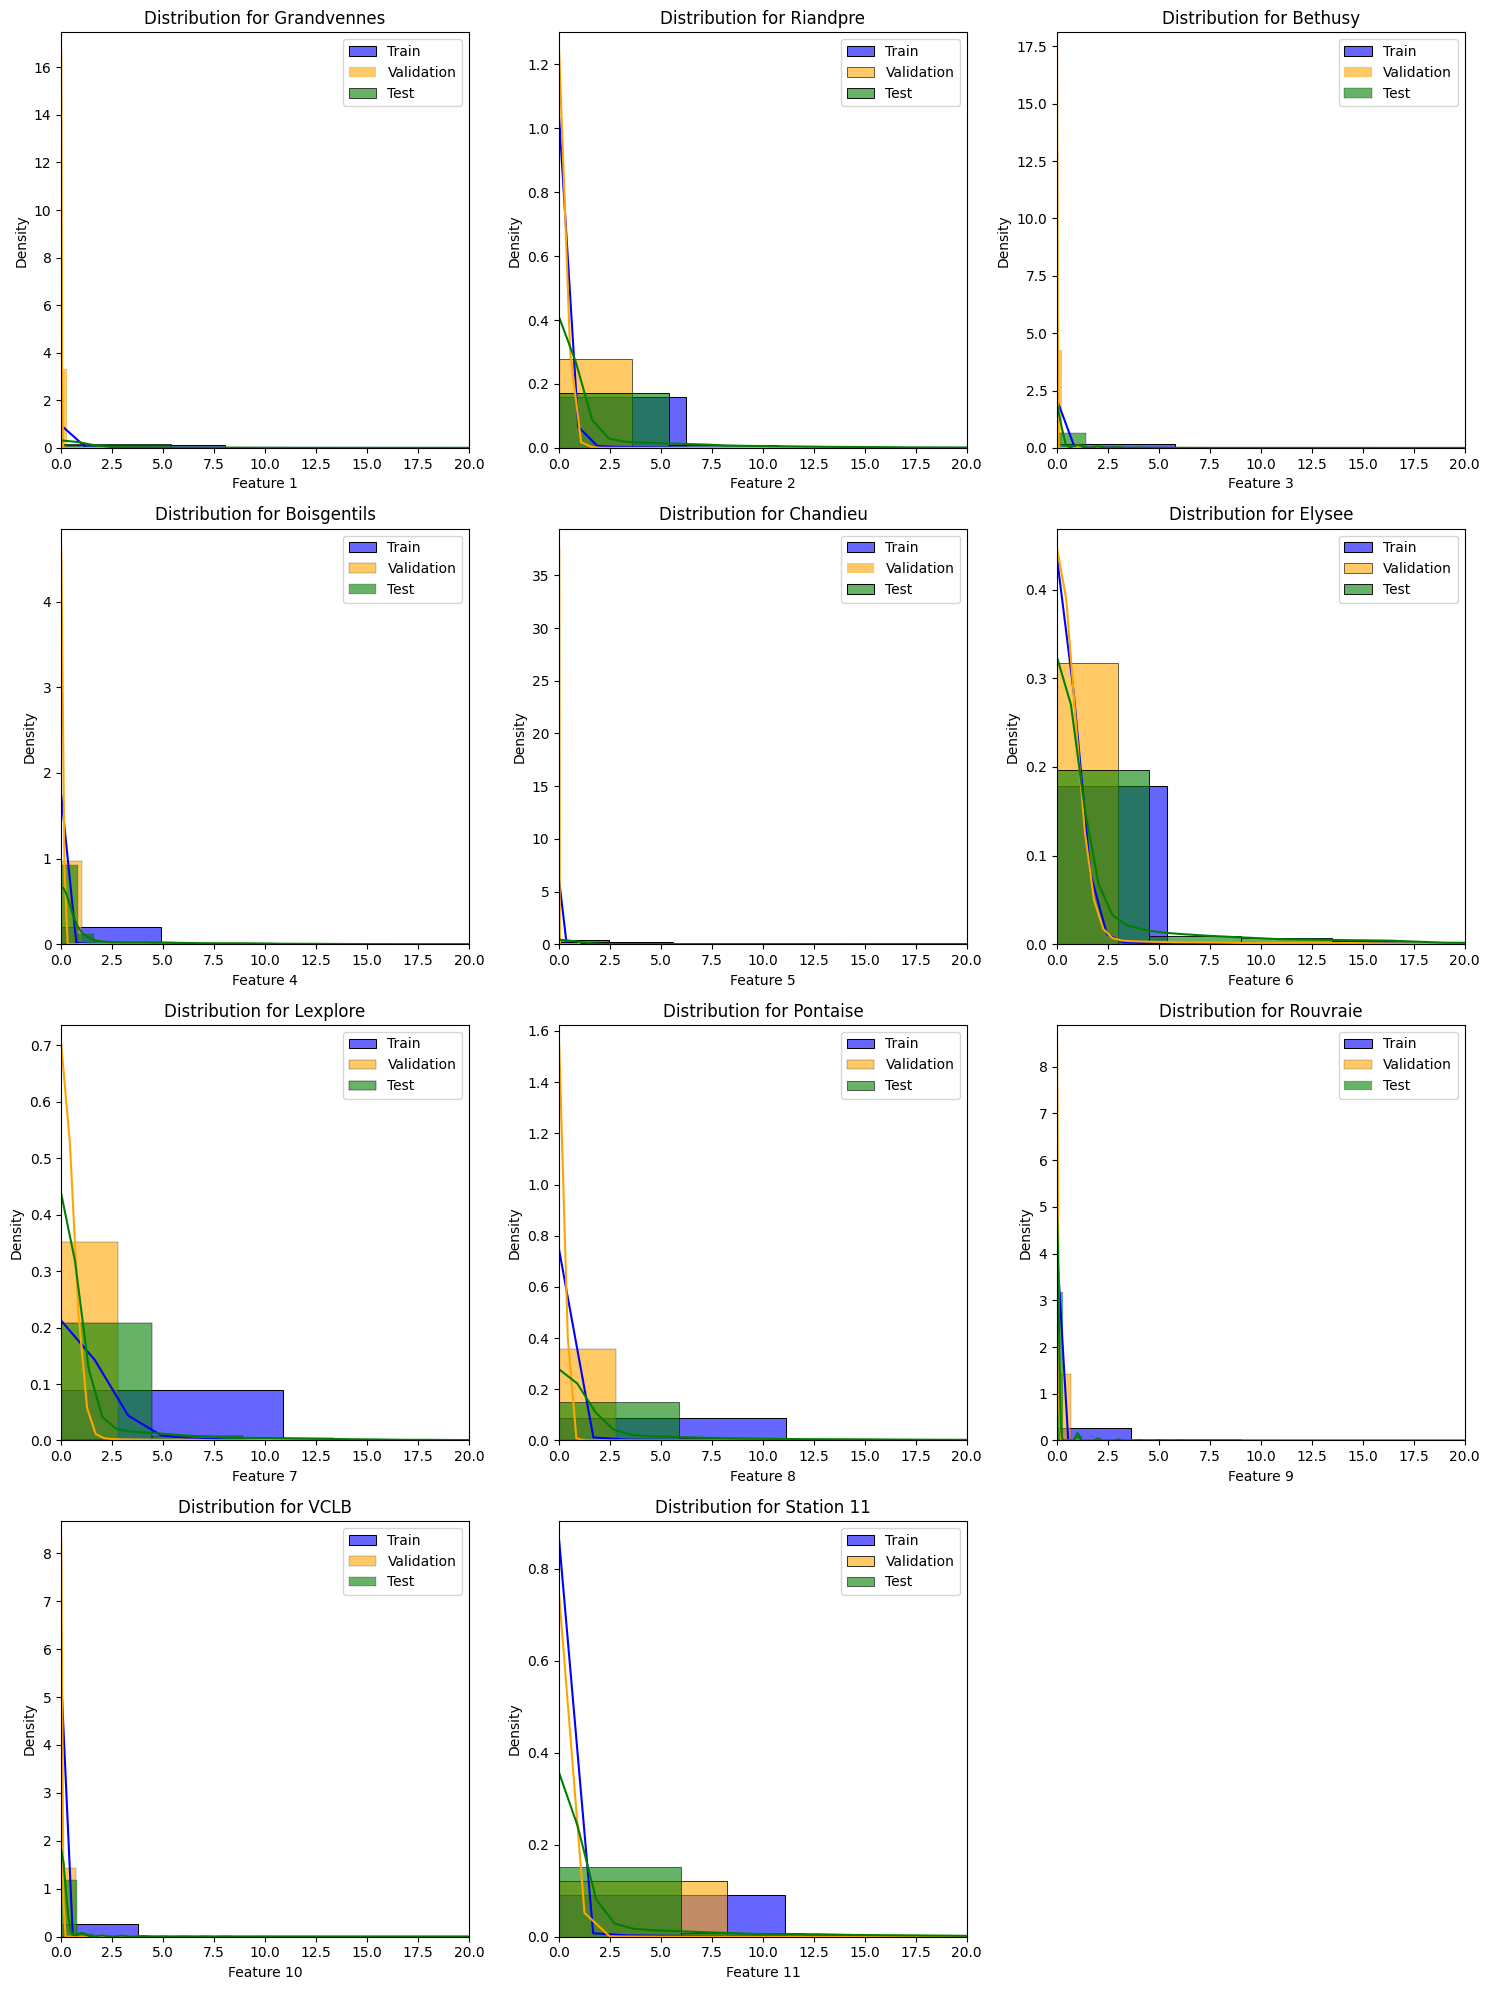

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distributions(X_train, X_valid, X_test, feature_names=None, bins=30):
    """
    Visualise les distributions des ensembles d'entraînement, de validation et de test.

    Parameters:
    - X_train, X_valid, X_test : Arrays numpy ou pandas DataFrames des données.
    - feature_names : Liste des noms des caractéristiques (facultatif, pour un affichage personnalisé).
    - bins : Nombre de bins pour l'histogramme.
    """
    # Convertir en numpy si nécessaire
    if not isinstance(X_train, np.ndarray):
        X_train = X_train.values
    if not isinstance(X_valid, np.ndarray):
        X_valid = X_valid.values
    if not isinstance(X_test, np.ndarray):
        X_test = X_test.values

    # Vérifiez que toutes les données ont le même nombre de colonnes
    if X_train.shape[1] != X_valid.shape[1] or X_train.shape[1] != X_test.shape[1]:
        raise ValueError("Les données d'entraînement, de validation et de test doivent avoir le même nombre de colonnes.")

    # Générer des noms de caractéristiques par défaut si nécessaire
    num_features = X_train.shape[1]
    if feature_names is None or len(feature_names) != num_features:
        feature_names = [f"Feature {i+1}" for i in range(num_features)]

    rows = (num_features + 2) // 3
    plt.figure(figsize=(15, 5 * rows))

    for i in range(num_features):
        plt.subplot(rows, 3, i + 1)

        # Trace les distributions pour chaque ensemble
        sns.histplot(X_train[:, i], kde=True, color='blue', label='Train', bins=bins, stat='density', alpha=0.6)
        sns.histplot(X_valid[:, i], kde=True, color='orange', label='Validation', bins=bins, stat='density', alpha=0.6)
        sns.histplot(X_test[:, i], kde=True, color='green', label='Test', bins=bins, stat='density', alpha=0.6)

        plt.title(f'Distribution for {station_names[i]}')
        plt.xlabel(feature_names[i])
        plt.ylabel('Density')
        plt.legend()

        # Limiter les valeurs de l'axe x entre 0 et 20
        plt.xlim(0, 20)

    plt.tight_layout()
    plt.show()

    # Exemple d'utilisation avec des noms de stations
station_names = ["Grandvennes", "Riandpre", "Bethusy", "Boisgentils", "Chandieu",
                 "Elysee", "Lexplore", "Pontaise", "Rouvraie", "VCLB", "Geopolis"]


# Vérifiez la forme de vos données
print(X_train.shape, X_valid.shape, X_test.shape)

# Exemple d'utilisation
plot_distributions(X_train, X_valid, X_test)


In [ ]:
# Range of components to evaluate
component_range = range(2, 10)  # For component numbers 2, 3, 4, 5, 6, 7, 8, 9

# Store results
models = {}
bic_scores = []
silhouette_scores = []

# Loop through the range of components
for n_components in component_range:
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train)  # Assuming X_train is your data

    # Store the model and metrics
    models[n_components] = gmm
    bic_scores.append(gmm.bic(X_train))

    # Predict cluster labels
    labels = gmm.predict(X_train)

    # Calculate silhouette score
    silhouette = silhouette_score(X_train, labels)
    silhouette_scores.append(silhouette)



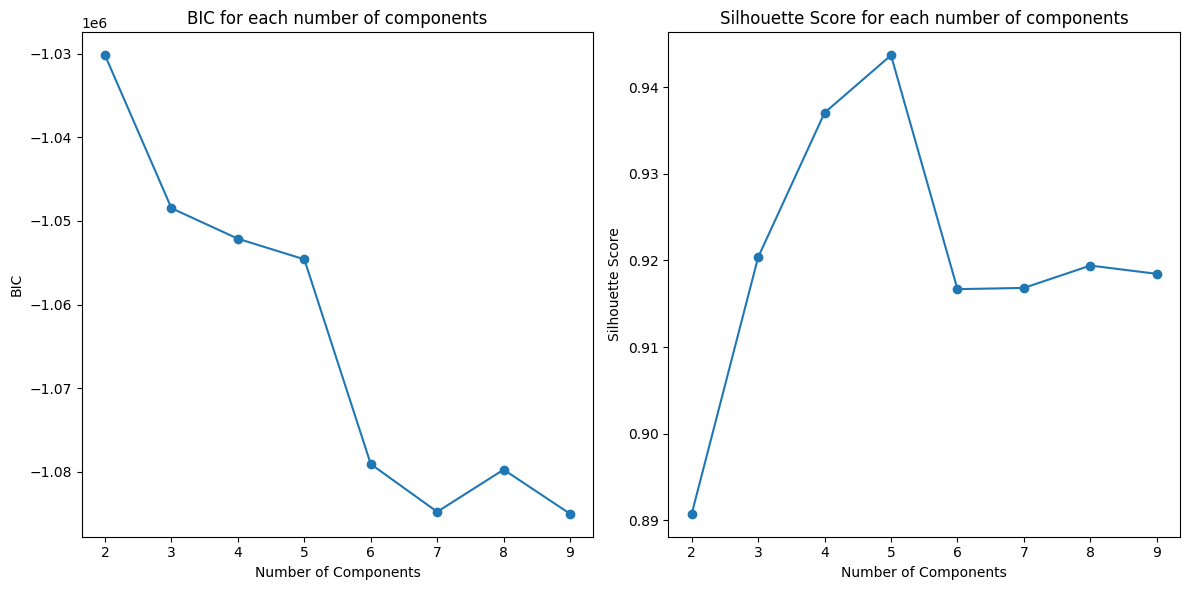

Best number of components: 9 based on BIC


In [ ]:
# Plot BIC, and Silhouette Score for each number of components
plt.figure(figsize=(12, 6))


# Plot BIC
plt.subplot(1, 2, 1)
plt.plot(component_range, bic_scores, marker='o')
plt.title('BIC for each number of components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(component_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for each number of components')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')

plt.tight_layout()

# Save the figure as a PDF
output_path = "plot_bic_silhouette_full.pdf"
plt.savefig(output_path, format='pdf')


plt.show()

# Select the best model based on the criteria you prefer (AIC, BIC, or silhouette score)
best_n_components = component_range[np.argmin(bic_scores)]
best_gmm_model = models[best_n_components]
print(f"Best number of components: {best_n_components} based on BIC")


In [ ]:
#search for best combination of values for both the number of clusters
#and the covariance_type hyperparameter:

min_bic = np.infty

for k in range(1, 7):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X_train).bic(X_train)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print('best_k')
print(best_k)
print('best_covariance_type')
print(best_covariance_type)



best_k
6
best_covariance_type
full


In [ ]:
# Initialize the Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=5, covariance_type='diag', random_state=42)

In [ ]:
# Fit the model
gmm.fit(X_train)

GaussianMixture(covariance_type='diag', n_components=5, random_state=42)

In [ ]:
# Print the GMM parameters
print("Means of the components:\n", gmm.means_)
print("\nCovariances of the components:\n", gmm.covariances_)
print("\nWeights of the components:\n", gmm.weights_)

# Predict the component labels for each data point
component = gmm.predict(X_train)
proba = gmm.predict_proba(X_train)

# Display the predicted labels
print("Predicted component labels for the data points:\n", labels)
print("Predicted probabilities for each component:\n", proba)

Means of the components:
 [[ 0.          0.        ]
 [11.4709064  16.06947369]
 [ 1.75901575  5.98452866]
 [90.00802179 81.01598665]
 [ 0.17149716  1.2998253 ]]

Covariances of the components:
 [[1.00000000e-06 1.00000000e-06]
 [9.19142252e+01 8.99848169e+01]
 [5.47037272e+00 1.93174854e+01]
 [4.82611166e+03 1.91434893e+03]
 [1.42168889e-01 8.00026760e-01]]

Weights of the components:
 [9.27764696e-01 5.76915126e-03 2.12330247e-02 7.78927990e-04
 4.44541996e-02]
Predicted component labels for the data points:
 [0 0 0 ... 0 0 0]
Predicted probabilities for each component:
 [[9.99999955e-01 7.95962380e-12 6.64014339e-10 2.14889301e-14
  4.45669592e-08]
 [9.99999955e-01 7.95962380e-12 6.64014339e-10 2.14889301e-14
  4.45669592e-08]
 [9.99999955e-01 7.95962380e-12 6.64014339e-10 2.14889301e-14
  4.45669592e-08]
 ...
 [9.99999955e-01 7.95962380e-12 6.64014339e-10 2.14889301e-14
  4.45669592e-08]
 [9.99999955e-01 7.95962380e-12 6.64014339e-10 2.14889301e-14
  4.45669592e-08]
 [9.99999955e-0

In [ ]:
# Evaluate the log-likelihood of the trained GMM
log_likelihood = gmm.score(X_train)
print(f'Log-Likelihood: {log_likelihood}')

# Get the labels predicted by the GMM
labels = gmm.predict(X_train)

# Compute silhouette score
silhouette = silhouette_score(X_train, labels)
print(f'Silhouette Score: {silhouette}')


Log-Likelihood: 10.560463000091696
Silhouette Score: 0.9429709355102771


In [ ]:
Valid_score = gmm.score(X_valid)  # Log-likelihood score on validation data
Valid_labels = gmm.predict(X_valid)  # Cluster labels for validation data
silhouette = silhouette_score(X_valid, Valid_labels)  # Silhouette score

print(f"Log-likelihood on validation set: {Valid_score}")
print(f"Silhouette score on validation set: {silhouette}")

Log-likelihood on validation set: 8.921624536506746
Silhouette score on validation set: 0.8772905695541952


In [ ]:
Test_score = gmm.score(X_test)  # Log-likelihood score on test data
Test_labels = gmm.predict(X_test)  # Cluster labels for test data
silhouette = silhouette_score(X_test, Test_labels)  # Silhouette score

print(f"Log-likelihood on test set: {Test_score}")
print(f"Silhouette score on test set: {silhouette}")


Log-likelihood on test set: 6.2123872044393424
Silhouette score on test set: 0.76404838728924


In [ ]:
# Calculate BIC for training data
train_bic = gmm.bic(X_train)
print(f"BIC (Train): {train_bic}")

# Similarly, calculate BIC for validation and test data
val_bic = gmm.bic(X_valid)
print(f"BIC (Validation): {val_bic}")

test_bic = gmm.bic(X_test)
print(f"BIC (Test): {test_bic}")


BIC (Train): -1054592.9450537623
BIC (Validation): -190332.573452464
BIC (Test): -132477.2712098072
